structure requited

|
|mats/events.txt
|lab13.ipynb

In [38]:
print("restart Kernel and run again")
import cv2
import numpy as np
import matplotlib.pyplot as plt

restart Kernel and run again


In [39]:
# filter the events.txt file to only include the events with timestamp (1st column) between 0 and 1 second

def filter_events(start, stop):
  name = f'mats/events_{start}__{stop}.txt'
  #replace all the dots but the last one with underscore
  name = name.replace('.', '_', name.count('.')-1)

  # check if the file already exists
  try:
    with open(name, 'r') as f:
      print(f'File {name} already exists')
      return
  except FileNotFoundError:
    pass
  # read the events.txt file
  events = np.loadtxt('mats/events.txt', delimiter=' ')

  #check the shape of the events
  print(events.shape)

  # filter the events with timestamp between start and stop second
  events = events[(events[:,0] >= start) & (events[:,0] <= stop)]

  # check the shape of the events after filtering
  print(events.shape)

  #save the filtered events to a new file



  np.savetxt(name, events, fmt='%.9f %d %d %d', delimiter=' ')




In [40]:
filter_events(0, 1)
filter_events(0.5, 1)

File mats/events_0__1.txt already exists
File mats/events_0_5__1.txt already exists


In [41]:
filter_events(1, 2)

File mats/events_1__2.txt already exists


Number of events: 72046
First timestamp: 0.0
Last timestamp: 1.0
Maximum x coordinate: 239
Minimum x coordinate: 4
Maximum y coordinate: 179
Minimum y coordinate: 1
Number of positive polarity events: 31037
Number of negative polarity events: 41009


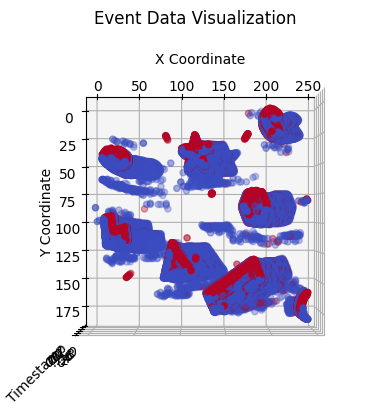

In [42]:


def read_events_file(file_path):
    with open(file_path, 'r') as file:
        events = file.readlines()
    return events

def filter_events(events):
    filtered_events = []
    for event in events:
        timestamp = float(event.split()[0])
        if timestamp < 1:
            filtered_events.append(event)
        else:
            break
    return filtered_events

def split_events(filtered_events):
    timestamps, xs, ys, polarities = [], [], [], []
    for event in filtered_events:
        timestamp, x, y, polarity = event.split()
        timestamps.append(float(timestamp))
        xs.append(int(x))
        ys.append(int(y))
        polarities.append(int(polarity))
    return timestamps, xs, ys, polarities

def analyze_events(timestamps, xs, ys, polarities):
    num_events = len(timestamps)
    first_timestamp = timestamps[0]
    last_timestamp = timestamps[-1]
    max_x = max(xs)
    min_x = min(xs)
    max_y = max(ys)
    min_y = min(ys)
    num_positive_events = sum(1 for p in polarities if p == 1)
    num_negative_events = sum(1 for p in polarities if p == 0)

    print("Number of events:", num_events)
    print("First timestamp:", first_timestamp)
    print("Last timestamp:", last_timestamp)
    print("Maximum x coordinate:", max_x)
    print("Minimum x coordinate:", min_x)
    print("Maximum y coordinate:", max_y)
    print("Minimum y coordinate:", min_y)
    print("Number of positive polarity events:", num_positive_events)
    print("Number of negative polarity events:", num_negative_events)

    return num_events, first_timestamp, last_timestamp, max_x, min_x, max_y, min_y, num_positive_events, num_negative_events

def visualize_events(xs, ys, timestamps, polarities, save=False):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs, ys, timestamps, c=polarities, cmap='coolwarm')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Timestamp')
    ax.set_title('Event Data Visualization')
    ax.view_init(elev=-90, azim=-90)
    plt.show()

    if save:
        plt.savefig('event_data_visualization.png')

events_file_path = "mats/events_0__1.txt"
filtered_events = read_events_file(events_file_path)
# filtered_events = filter_events(events)
timestamps, xs, ys, polarities = split_events(filtered_events)

analyze_events(timestamps, xs, ys, polarities)
visualize_events(xs, ys, timestamps, polarities)


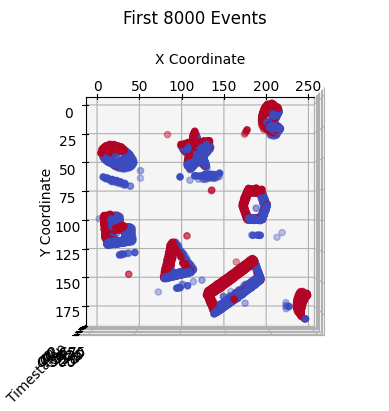

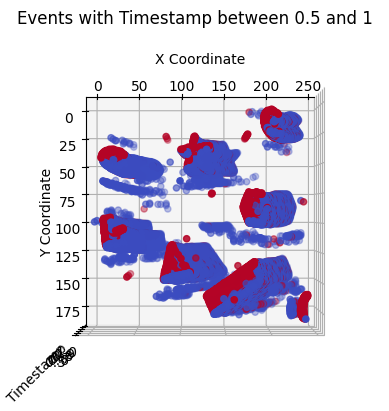

In [43]:
def read_events(file_path, num_events=None):
    events = []
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            if num_events is not None and i >= num_events:
                break
            timestamp, x, y, polarity = map(float, line.strip().split())
            events.append((timestamp, x, y, polarity))
    return events

def visualize_events(xs, ys, timestamps, polarities, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs, ys, timestamps, c=polarities, cmap='coolwarm')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Timestamp')
    ax.set_title(title)
    ax.view_init(elev=-90, azim=-90)

events_1 = read_events('mats/events_0_5__1.txt', num_events=8000)
timestamps_1 = [event[0] for event in events_1]
xs_1 = [event[1] for event in events_1]
ys_1 = [event[2] for event in events_1]
polarities_1 = [event[3] for event in events_1]
visualize_events(xs_1, ys_1, timestamps_1, polarities_1, 'First 8000 Events')

filtered_events_2 = read_events('mats/events_0_5__1.txt')

timestamps_2 = [event[0] for event in filtered_events_2]
xs_2 = [event[1] for event in filtered_events_2]
ys_2 = [event[2] for event in filtered_events_2]
polarities_2 = [event[3] for event in filtered_events_2]
visualize_events(xs_2, ys_2, timestamps_2, polarities_2, 'Events with Timestamp between 0.5 and 1')

plt.show()

In [44]:
def event_frame(event_x, event_y, event_polarity, image_shape):
    event_image = np.ones(image_shape) * 127
    
    for x, y, polarity in zip(event_x, event_y, event_polarity):
        event_image[y, x] = 255 if polarity == 1 else 0
    
    event_image = event_image.astype(np.uint8)
    
    return event_image

with open("mats/events_1__2.txt", "r") as file:
    timestamps = []
    x_coordinates = []
    y_coordinates = []
    polarities = []

    for line in file:
        parts = line.split()
        timestamp = float(parts[0])
        x_coord = int(parts[1])
        y_coord = int(parts[2])
        polarity = int(parts[3])
        
        # if 1 < timestamp < 2:
        timestamps.append(timestamp)
        x_coordinates.append(x_coord)
        y_coordinates.append(y_coord)
        polarity = 1 if polarity == 1 else -1
        polarities.append(polarity)


def play_video(tau = 0.01):
    temp_timestamps = []
    temp_x = []
    temp_y = []
    temp_polarities = []
    for timestamp, x, y, polarity in zip(timestamps, x_coordinates, y_coordinates, polarities):
        temp_timestamps.append(timestamp)
        temp_x.append(x)
        temp_y.append(y)
        temp_polarities.append(polarity)
        
        if temp_timestamps[-1] - temp_timestamps[0] > tau:
            event_img = event_frame(temp_x, temp_y, temp_polarities, (180, 240))

            cv2.imshow("Event Frame", event_img)
            cv2.waitKey(50)

            # add break point
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

            temp_timestamps.clear()
            temp_x.clear()
            temp_y.clear()
            temp_polarities.clear()
            
    cv2.destroyAllWindows()


In [35]:
play_video(0.001)

In [36]:
play_video(0.01)

In [37]:
play_video(0.1)